In [2]:
import os

file_list = os.listdir("data/argoverse_processed/train")
a = sorted(file_list, key = lambda f: int(f.split('.')[0]))
a[:3]

['1.pkl', '2.pkl', '3.pkl']

In [11]:
a[9717]

'10019.pkl'

In [12]:
import pickle
import os

root_dir = "data/argoverse_processed/train/"
file_list = sorted(os.listdir(root_dir), key = lambda a: int(a.split('.')[0]))


index = 9717
with open(root_dir + file_list[index], 'rb') as f:
    data = pickle.load(f)
    print(data["PATH"])

/workspace/myunghak/WIMP/data/argoverse_raw/test/10019.csv


In [28]:
data["ROTATION"], data["TRANSLATION"]

(84.80436, [-736.0875, -2367.8074])

In [15]:
data["SOCIAL"][0]["HEURISTIC_NEAREST_HEADING_ANGLE_PARTIAL"]

array([  46.518333 ,  -29.751072 ,   -3.1800141,  -88.77305  ,
        -15.329437 ,  -74.97265  ,    8.126458 , -103.81991  ,
         84.22618  ,  -29.800108 ,  -42.345055 ,  -22.158905 ,
       -149.73705  ,  -40.534584 ,  -18.504976 ,    3.4980004,
        -25.697407 ,  -59.887287 ,   46.66387  ,  -44.362434 ],
      dtype=float32)

In [29]:
data["CITY_NAME"]

'MIA'

In [30]:
# for k in data.keys():
#     try:
#         print(k , ": ", data[k].shape)
#     except:
#         try:
#             print(k , " len: ", len(data[k]))
#         except:
#             print("SSSSS")
#             pass

In [32]:
# for S in data['SOCIAL']:
#     for k in S.keys():
#         try:
#             print(k, ": ", S[k].shape)
#         except:
#             print(k, ": ", S[k])
    
# #     print(S.keys())
    
#     print("=" *100)


In [33]:
# for k in data["AGENT"].keys():
#     try:
#         print(k, ": ", data["AGENT"][k].shape)
#     except:
#         try:
#             print(k)
#             for i in range(len(data["AGENT"][k])):
#                 blank = str(" "*(len(k)-1))
#                 print(blank , i ,":", data["AGENT"][k][i].shape)
#         except:
#             for i in range(len(data["AGENT"][k])):
#                 blank = str(" "*(len(k)-1))
#                 print(blank , i ,":", data["AGENT"][k][i].shape)#         break
# #     print(S.keys())



In [34]:
# for i in data['AGENT']['TEST_CANDIDATE_CENTERLINE_ADDITIONAL_PARTIAL']:
#     print(i)

In [35]:
# for i in data['AGENT']['TEST_CANDIDATE_CENTERLINE_ADDITIONAL_PARTIAL']:
# #     print(i.keys())
#     for k in i.keys():
#         print(k, i[k].shape)
#     print("=" * 100 + "*", len(data['AGENT']['TEST_CANDIDATE_CENTERLINE_ADDITIONAL_PARTIAL']))
# #     for k in data['AGENT']['TEST_CANDIDATE_CENTERLINE_ADDITIONAL_PARTIAL'][i]:
# #         print(data['AGENT']['TEST_CANDIDATE_CENTERLINE_ADDITIONAL_PARTIAL'])
# #         break
# #     break
# # #     print(i.keys())
# #     print("=" * 100)

In [80]:
import pickle
import os

root_dir = "data/argoverse_processed/train/"
file_list = sorted(os.listdir(root_dir), key = lambda a : int(a.split(".")[0]))


index = 14
with open(root_dir + file_list[index], 'rb') as f:
    data = pickle.load(f)


In [99]:
import pickle
import os

root_dir = "data/argoverse_processed/val/"
file_list = sorted(os.listdir(root_dir), key = lambda a: int(a.split('.')[0]))


index = 0
with open(root_dir + file_list[index], 'rb') as f:
    data = pickle.load(f)


In [100]:
data['PATH']

'/workspace/MotionPrediction/WIMP/data/argoverse_raw/val/1.csv'

In [112]:
local_lane_polygons = am.find_local_lane_polygons([0, 1000, 0, 1000], data["CITY_NAME"])


1280.2921 1280.1716


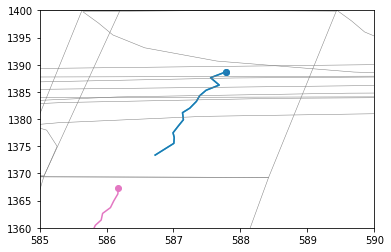

In [131]:
from matplotlib import pyplot as plt


plt.xlim(585, 590)
plt.ylim(1360, 1400)

for index in range(109, 110):
    with open(root_dir + file_list[index], 'rb') as f:
        data = pickle.load(f)
        

    xmax = 0
    xmin = 999999
    ymax = 0
    ymin = 99999
    for i in range(len(data["SOCIAL"])):
        try:
            x = data['SOCIAL'][i]['LABELS_UNNORMALIZED'][...,0]
            y = data['SOCIAL'][i]['LABELS_UNNORMALIZED'][...,1]
        except:
    #         print(data['SOCIAL'][i]['LABELS'])
            pass
        plt.scatter(x[-1], y[-1], color = "C" + str(i))
        plt.plot(x,y,color = "C" + str(i))

    xmax = max(x)
    xmin = min(x)
    ymax = max(y)
    ymin = min(y)
    print(ymax, ymin)
    local_lane_polygons = am.find_local_lane_polygons([550, 600, 1280, 1420], data["CITY_NAME"])
    
    for l in local_lane_polygons:
        x_l = l[...,0]
        y_l = l[...,1]
        plt.plot(x_l,y_l,linewidth=0.5, color = 'gray')
    
    plt.show()

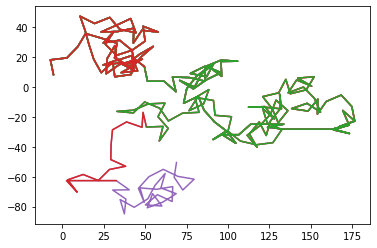

In [15]:
import math

x = 0
y = 0
X = []
Y = []
for j in range(len(data["SOCIAL"])):
    try:
        for i in data["SOCIAL"][j]["HEURISTIC_NEAREST_HEADING_ANGLE_LABEL_PARTIAL"]:
            x+=10 * math.cos(i)
            y+=10 * math.sin(i)
            X.append(x)
            Y.append(y)
        plt.plot(X,Y,color = str('C' + str(j+2)), zorder=-i)
#         plt.show()
    except:
        pass
# plt.show()

960


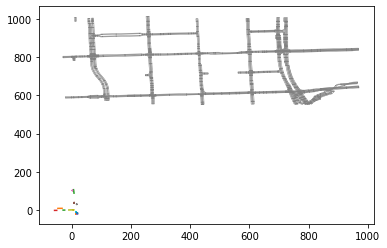

In [16]:
from argoverse.map_representation.map_api import ArgoverseMap

am = ArgoverseMap()


for i in range(len(data["SOCIAL"])):

    x = data["SOCIAL"][i]["XY_FEATURES"][...,0]
    y = data["SOCIAL"][i]["XY_FEATURES"][...,1]
    plt.plot(x,y)
    x = data["SOCIAL"][i]["HEURISTIC_ORACLE_CENTERLINE_NORMALIZED_PARTIAL"][...,0]
    y = data["SOCIAL"][i]["HEURISTIC_ORACLE_CENTERLINE_NORMALIZED_PARTIAL"][...,1]
#     plt.plot(x,y, linewidth=1)

xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)
local_lane_polygons = am.find_local_lane_polygons([0, 1000, 0, 1000], data["CITY_NAME"])
print(len(local_lane_polygons))
for l in local_lane_polygons:
    x_l = l[...,0]
    y_l = l[...,1]
    plt.plot(x_l,y_l,linewidth=0.5, color = 'gray')
plt.show()

4806


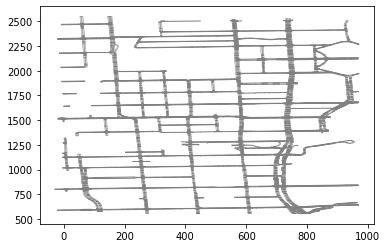

In [17]:
local_lane_polygons = am.find_local_lane_polygons([0, 2500, 0, 2500], data["CITY_NAME"])
print(len(local_lane_polygons))
for l in local_lane_polygons:
    x_l = l[...,0]
    y_l = l[...,1]
    plt.plot(x_l,y_l,linewidth=0.5, color = 'gray')
plt.show()

In [18]:
[xmin, xmax, ymin, ymax]

[-152.72171, 168.06671, -10.032974, 30.23592]

In [19]:
local_lane_polygons = am.find_local_lane_polygons([0, 10000, 0, 10000], data["CITY_NAME"])
local_lane_polygons

array([array([[ 253.94631295, 1783.30972556,           nan],
       [ 254.13684845, 1781.64087371,           nan],
       [ 254.32738396, 1779.97202186,           nan],
       [ 254.51791946, 1778.30317001,           nan],
       [ 254.70845497, 1776.63431816,           nan],
       [ 254.89899047, 1774.96546632,           nan],
       [ 255.08952598, 1773.29661447,           nan],
       [ 255.28006149, 1771.62776262,           nan],
       [ 255.47059699, 1769.95891077,           nan],
       [ 255.6611325 , 1768.29005892,           nan],
       [ 251.88565977, 1767.85900712,           nan],
       [ 251.69512426, 1769.52785896,           nan],
       [ 251.50458875, 1771.19671081,           nan],
       [ 251.31405325, 1772.86556266,           nan],
       [ 251.12351774, 1774.53441451,           nan],
       [ 250.93298224, 1776.20326636,           nan],
       [ 250.74244673, 1777.87211821,           nan],
       [ 250.55191123, 1779.54097005,           nan],
       [ 250.36137572

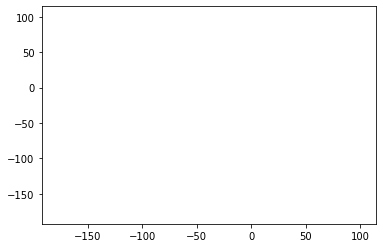

In [20]:
current_feature = "HEURISTIC_NEAREST_ABSOLUTE_ANGLE_PARTIAL"

for i in range(len(data["SOCIAL"])):
    try:
        for j in range(len(data["SOCIAL"][i][current_feature])):
            x = data["SOCIAL"][i][current_feature][j][...,0]
            y = data["SOCIAL"][i][current_feature][j][...,1]
            plt.plot(x,y)
    except:
        print("SS")
plt.show()


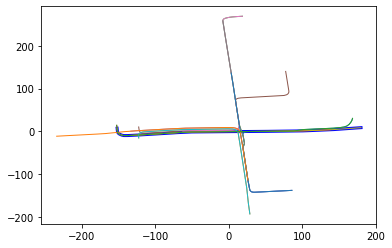

In [21]:
feature_name = "HEURISTIC_ORACLE_CENTERLINE_NORMALIZED_PARTIAL"
x = data["AGENT"][feature_name][...,0]
y = data["AGENT"][feature_name][...,1]
plt.plot(x,y, color = 'blue',linewidth=3)
for i in range(len(data["SOCIAL"])):
    try:
        x = data["SOCIAL"][i][feature_name][...,0]
        y = data["SOCIAL"][i][feature_name][...,1]
        plt.plot(x,y, linewidth=1)
    except:
        pass
plt.show()



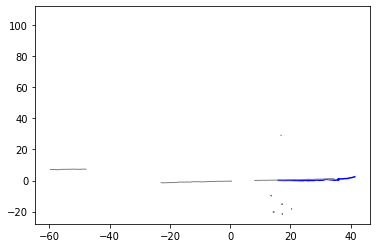

In [23]:
x = data["AGENT"]["LABELS"][...,0]
y = data["AGENT"]["LABELS"][...,1]
plt.plot(x,y, color = 'blue')
for i in range(len(data["SOCIAL"])):
    try:
        x = data["SOCIAL"][i]["LABELS"][...,0]
        y = data["SOCIAL"][i]["LABELS"][...,1]
        plt.plot(x,y, linewidth=1, color='gray')
    except:
        pass
plt.show()



In [263]:

current_feature = "HEURISTIC_NEAREST_CENTERLINE_FEATURES_PARTIAL"
plt.figure(figsize=(12, 12))
for i in range(len(data["AGENT"][current_feature][""])):
    try:
        x = data["AGENT"][current_feature][i][...,0]
        y = data["AGENT"][current_feature][i][...,1]
        plt.plot(x,y, label=str(i),zorder=-i,linewidth=i/5+1)
    except:
        print("SS")
plt.legend()
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 864x864 with 0 Axes>

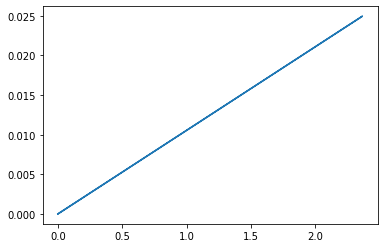

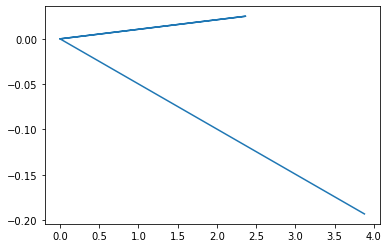

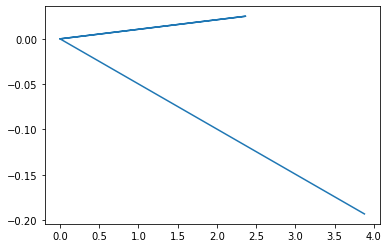

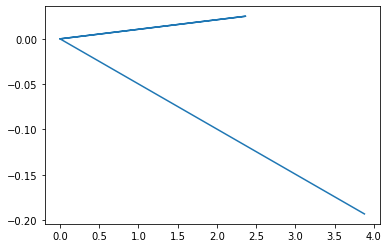

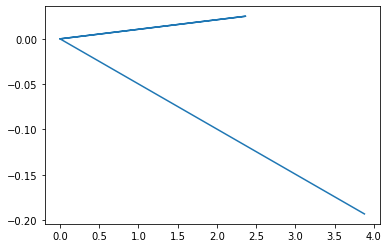

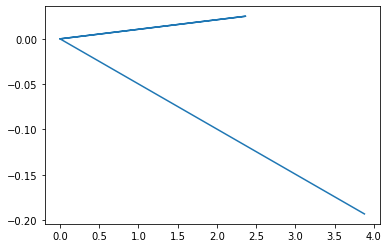

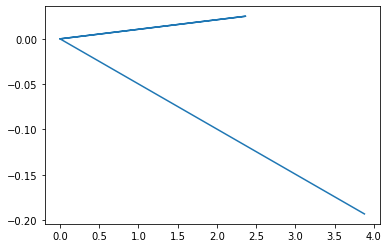

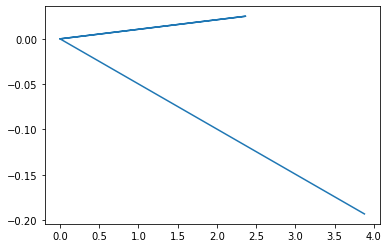

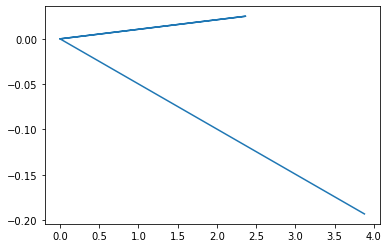

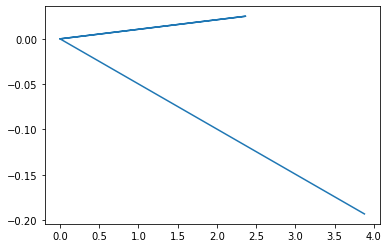

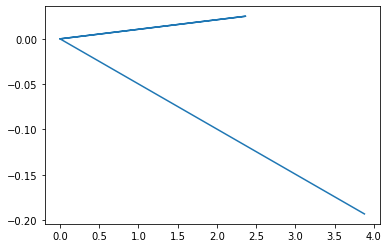

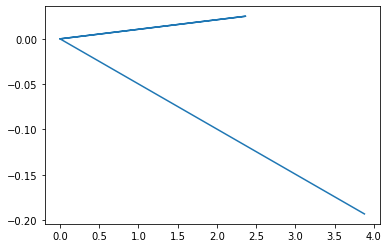

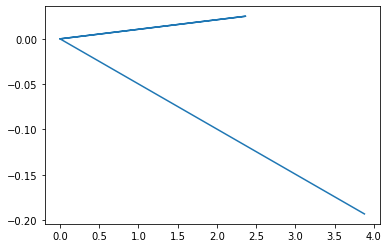

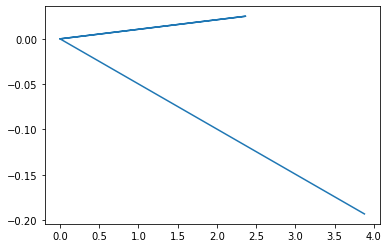

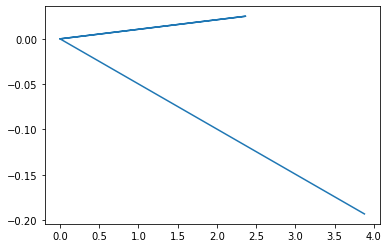

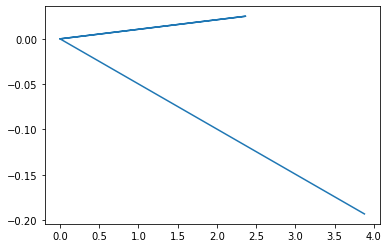

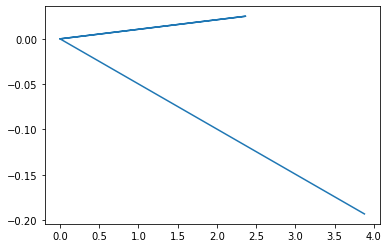

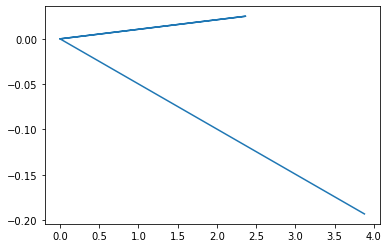

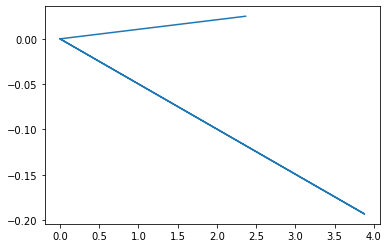

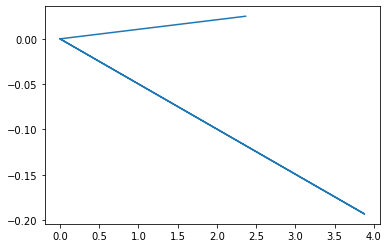

In [245]:

current_feature = "HEURISTIC_NEAREST_VELOCITY_VECTOR_PARTIAL"

for i in range(len(data["AGENT"][current_feature])):
    try:
        x = data["AGENT"][current_feature][i][...,0]
        y = data["AGENT"][current_feature][i][...,1]
        plt.plot(x,y, label=str(i),zorder=-i)
        plt.show()
    except:
        print("SS")


In [252]:
y = data["AGENT"][current_feature][5][...,1]
y

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.02494302,  0.02494302,  0.02494302,  0.02494302,
        0.02494302,  0.02494302,  0.02494302,  0.02494302,  0.02494302,
        0.        , -0.1931451 , -0.1931451 , -0.1931451 ], dtype=float32)